## Random Forest in Stonktastic
***

### Summary:
In Stonktastic, we use three machine learning algorithum: Polynomial Regression, Long-Term Short-Term Memory and Random Forest.

Random Forest is an ensemble learning method used for classification and regression. A Random Forest model is generally the mean of many different desision tree's that are generated and modeled. By taking an average of many tree's, Random Forest alliviates the problem that desciesion trees often have of overfitting. 

### Stonktastic's use of Random Forest
Random Forest in Stonktastic uses sklearn's following libraries for machine learning calculations:
- *Ensemble* library for the Random Forest Regressor to preform the actual machine learning calculations
- *Metrics* : Used to get the metrics of the model, namely *mean squared error*

##### Data Split
We split the data not by randomly selecting 80/20 of the data to fall under Train/Test but instead cut off the last 20% to be used as the testing data itself. 

##### Saving and Loading
To save the data off after our initial calculations are preformed we use the *Pickle* library and save off the results of any calculations to the SQL lite database.

### Variables and Optimization

#### Variables looked at
We use two sets of variables in the Polynomial Regression. This includes which data points and what level of polynomial to use for calculations. The value of each is done by ranking options with the results/time taken to preform calculations. 

#### Preping for Analysis

In [1]:
import sys
sys.path.append('../')

import stonktastic
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sampleNum = 200

#### Pull Optimized Data DataFrame

In [2]:
ranForOpt = stonkCode.optimization.runRanForOptimization(stonkCode.config.stockToOpt)

Random Forest Optimization
SNP | Optimized Variables  : StochK, StochD, WILLR, Close, Date
SNP | Optimized Estimators : 10


### Random Forest Variables
We will be using the *Optimization* part of the script to look at the variables and graph the results of our choices

#### Exploring Subset of the Initial Variables

In [3]:
df = ranForOpt.subDf.copy(deep=True)
df.sort_values(by='score', ascending=False, inplace=True)
df = df.reset_index(drop=True)

print(f"Optimized Subset for Random Forest : {', '.join(ranForOpt.optSubSet)}")

Optimized Subset for Random Forest : StochK, StochD, WILLR, Close, Date


In [4]:
df

,subset,results,time,score,numOfVariables
0,"(StochK, StochD, WILLR, Close, Date)",0.997227,0.070651,14.114862,5
1,"(BBMiddleBand, BBLowerBand, StochD, Close, Date)",0.998239,0.070836,14.092243,5
2,"(BBMiddleBand, BBLowerBand, EMA, Close, Date)",0.998108,0.071197,14.018902,5
3,"(BBLowerBand, StochD, WILLR, Close, Date)",0.997640,0.071264,13.999214,5
4,"(MACDHist, BBMiddleBand, Chaikin, Close, Date)",0.997883,0.071369,13.982035,5
...,...,...,...,...,...
4012,"(SAR, MACDHist, BBLowerBand, StochK, StochD, C...",0.997599,0.202936,4.915825,7
4013,"(MACDHist, BBMiddleBand, BBLowerBand, EMA, Sto...",0.998306,0.203645,4.902186,8
4014,"(SAR, BBUpperBand, BBMiddleBand, BBLowerBand, ...",0.998434,0.204601,4.879907,7
4015,"(CCI, BBUpperBand, BBMiddleBand, BBLowerBand, ...",0.998337,0.213973,4.665715,7


#### Explore Variable Weight

In [5]:
ranForVariables = ["SAR","RSI","CCI","MACDHist", "BBUpperBand",
                    "BBMiddleBand","BBLowerBand","EMA", "Chaikin",
                    "StochK","StochD","WILLR"]
RowCount        = [0,0,0,0,0,0,0,0,0,0,0,0] 


ranForCounterDataframe = pd.DataFrame(RowCount,index=ranForVariables, columns=['Count'])


In [6]:
for idx, subsetList in enumerate(df["subset"].values.tolist()):
    for variable in ranForVariables:
        if variable in subsetList:
            ranForCounterDataframe.at[variable,'Count'] = (  ranForCounterDataframe.at[variable, 'Count'] + int(len(df) - idx)  )
            

In [7]:
ranForCounterDataframe.sort_values(by='Count', ascending=False, inplace=True)

#Normalize Data
lowestScore = ranForCounterDataframe['Count'].iloc[-1]
ranForCounterDataframe['Count'] = ranForCounterDataframe['Count'] - lowestScore

# Get percentages of Data
countSum = ranForCounterDataframe["Count"].sum()
ranForCounterDataframe['Count'] = ranForCounterDataframe['Count'].multiply((1/countSum)*100)

ranForCounterDataframe.drop(ranForCounterDataframe.tail(1).index, inplace = True) 


#### Exploring the relationship between number of variables and results

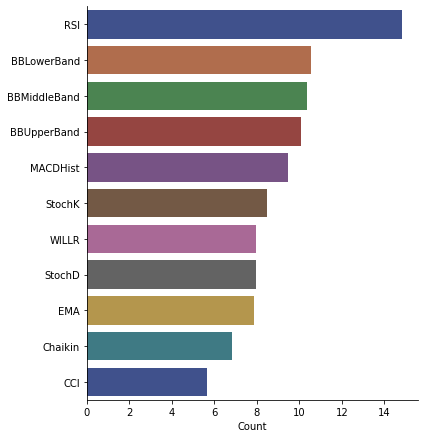

In [8]:
g = sns.catplot(
    data=ranForCounterDataframe, kind="bar",
    x="Count", y=ranForCounterDataframe.index.values, palette="dark", alpha=0.8, height=6,
    legend=False
)

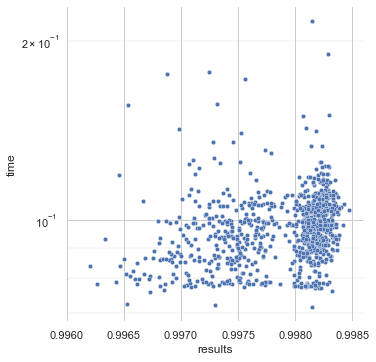

In [10]:
sns.set_theme(style="whitegrid")

cmap = sns.cubehelix_palette(rot=-.6, as_cmap=True)

g = sns.relplot(
    data=df.sample(1000),
    x="results", y="time",
    palette=cmap, s=20
)

g.set(xlim=(0.996, None))

g.set(yscale="log")
g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)
g.despine(left=True, bottom=True)

### Estimators 
Estimators are the number of Trees used in random forest simulation. 

We will be using the *Optimization* part of the script to look at the variables and graph the results of our choices. We want to know if the additional time required by the algorithum to preform the calculation using different power levels is worth the additional time and resource cost associated. 

In [11]:
ranForOpt.estimatorsDf

,estOption,results,time,score
0,10,0.997763,0.091069,10.956099
1,20,0.997829,0.157990,6.315767
2,30,0.997724,0.221832,4.497654
3,40,0.997801,0.289436,3.447395
4,50,0.997890,0.355197,2.809398
...,...,...,...,...
94,950,0.997892,6.468773,0.154263
95,960,0.997903,6.534662,0.152709
96,970,0.997916,6.585240,0.151538
97,980,0.997910,6.747673,0.147890


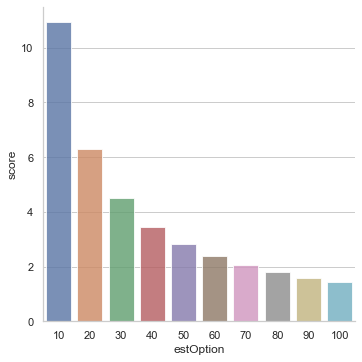

In [12]:
g = sns.catplot(data=ranForOpt.estimatorsDf.head(10), x="estOption", y="score",kind="bar", alpha=0.8)

### Results

##### Subsets
We found that the subset : "SAR, RSI, MACDHist, BBMiddleBand, BBLowerBand, EMA, Chaikin, StochD, Close, Date" preformed with the highest level of accuracy for the time required. This is the subset of variables that we use in the main calculations though if one required either higher levels of accuracy or a faster processing time, the variables could be tweeked.

##### Estimators
In the above graph, we can see that there is a sharp decrease in the *score* value after the *10* value in Estimators. This means that using anything more than 10 decision trees for a random forest calculation is not worth it for our purposes. 